<a href="https://colab.research.google.com/github/Pkolekar940/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Pramod Kolekar

# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


In [98]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Dataset Loading

In [99]:
# Load the database

url='https://drive.google.com/file/d/1m4lylf_iAyxlsIW1uTGrMSuhHYwuntJl/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)

In [100]:
# Load the database

url='https://drive.google.com/file/d/1JG_8OGZ6tS-0SOstH_x3n9sN0ZI1AFNC/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df2 = pd.read_csv(url)


### Dataset First View

In [101]:
# Dataset First Look
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [102]:
# Dataset first look
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [103]:
# Dataset Rows & Columns count
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [104]:
# Dataset Rows & Columns count
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Dataset Information

In [105]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [106]:
# Dataset Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [107]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

0

In [108]:
# Dataset Duplicate Value Count.
df2.duplicated().sum()

36

#### Missing Values/Null Values

In [109]:
# Missing Values/Null Values Count
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [110]:
# Missing Values/Null Values Count
df2.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

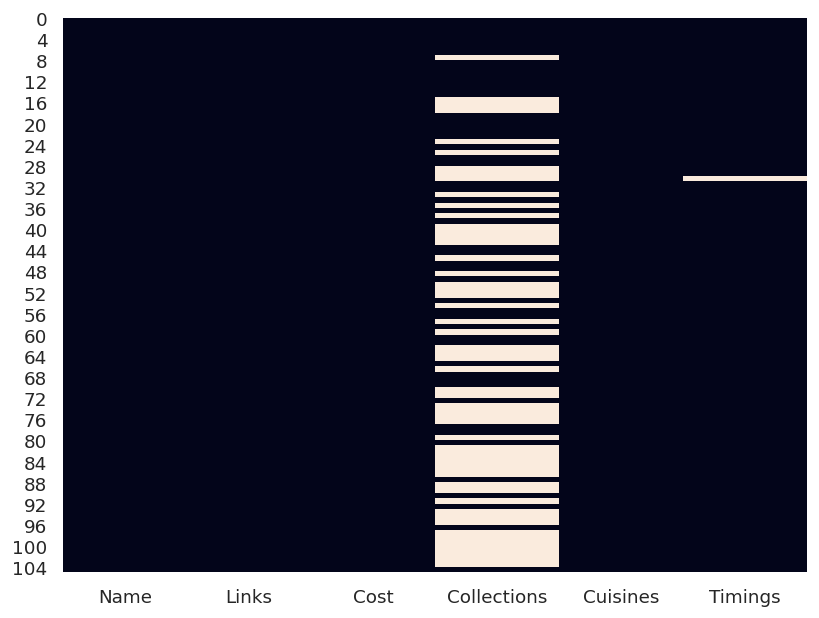

In [111]:
# Let's Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(df1.isnull(), cbar=False)

<Axes: >

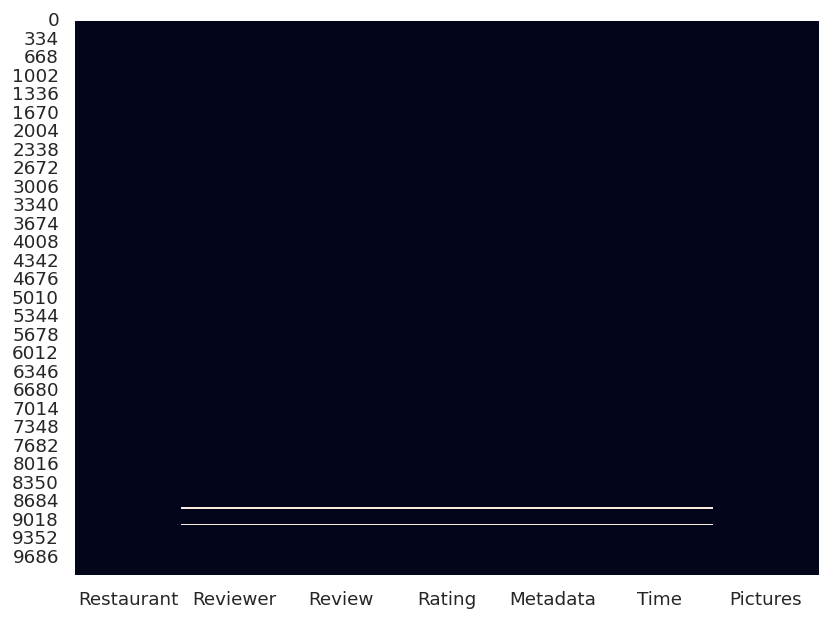

In [112]:
# Let's Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(df2.isnull(), cbar=False)

## ***2. Understanding Your Variables***

In [113]:
# Dataset Columns
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [114]:
# Dataset Describe
df1.describe(include='all').T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [116]:
# Dataset Columns
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [117]:
# Dataset Describe
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

$\color{green}{\text{Dataset 1}}$

$\color{red}{\text{Name}}$ - Name of Restaurants  
$\color{red}{\text{Links}}$ - URL Links of Restaurants  
$\color{red}{\text{Cost}}$ - Per Person estimated cost of dining  
$\color{red}{\text{Collection}}$ - Tagging of Restaurant with respect to Zomato categories  
$\color{red}{\text{Cuisines}}$ - Cuisines served by restaurants  
$\color{red}{\text{Timings}}$ - Restaurant timings

$\color{green}{\text{Dataset 2}}$

$\color{red}{\text{Reviewer}}$ - Name of the reviewer  
$\color{red}{\text{Review}}$ - Review text  
$\color{red}{\text{Rating}}$ - Rating provided  
$\color{red}{\text{MetaData}}$ - Reviewer metadata (No. of reviews and followers)  
$\color{red}{\text{Time}}$ - Data and Time of Review  
$\color{red}{\text{Pictures}}$ - No of pictures posted with review


### Check Unique Values for each variable.

In [118]:
# Let's Check Unique Values  of df1 for each variable.

for ele in df1:
  print(f'Number of unique values in {ele} is {df1[ele].nunique()}.')

Number of unique values in Name is 105.
Number of unique values in Links is 105.
Number of unique values in Cost is 29.
Number of unique values in Collections is 42.
Number of unique values in Cuisines is 92.
Number of unique values in Timings is 77.


In [119]:
# Let's Check Unique Values  of df2 for each variable.

for ele in df2:
  print(f'Number of unique values in {ele} is {df2[ele].nunique()}.')

Number of unique values in Restaurant is 100.
Number of unique values in Reviewer is 7446.
Number of unique values in Review is 9364.
Number of unique values in Rating is 10.
Number of unique values in Metadata is 2477.
Number of unique values in Time is 9782.
Number of unique values in Pictures is 36.


## 3. ***df Wrangling***

In [120]:
# Let's remove duplicate value from df2 Dataframe.
df2.drop_duplicates(inplace=True)

In [121]:
# Missing Values/Null Values Count
df2.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [122]:
df2[df2["Review"].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8844,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


In [123]:
# Drop rows where the "Review" column is null
df2.dropna(subset=["Review"], inplace=True)

In [124]:
# changing the data type of the cost function
df1['Cost'] = df1['Cost'].str.replace(",","").astype('int64')

In [125]:
# Let's Extract Year, Month, Day and Hour from Column Time.
df2['Time']=pd.to_datetime(df2['Time'])
df2['Year']=df2['Time'].dt.year
df2['Month']=df2['Time'].dt.month
df2['Day']=df2['Time'].dt.day_name()
df2['Hour']=df2['Time'].dt.hour
# df2.drop(['Time'], axis=1, inplace=True)

In [126]:
# substitutiong 'like' observation first by nan values ans then by mean of the feature
df2.loc[df2['Rating'] == 'Like'] = np.nan
df2['Rating'] = df2['Rating'].astype('float64')
print(df2['Rating'].mean())

3.600261201527024


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

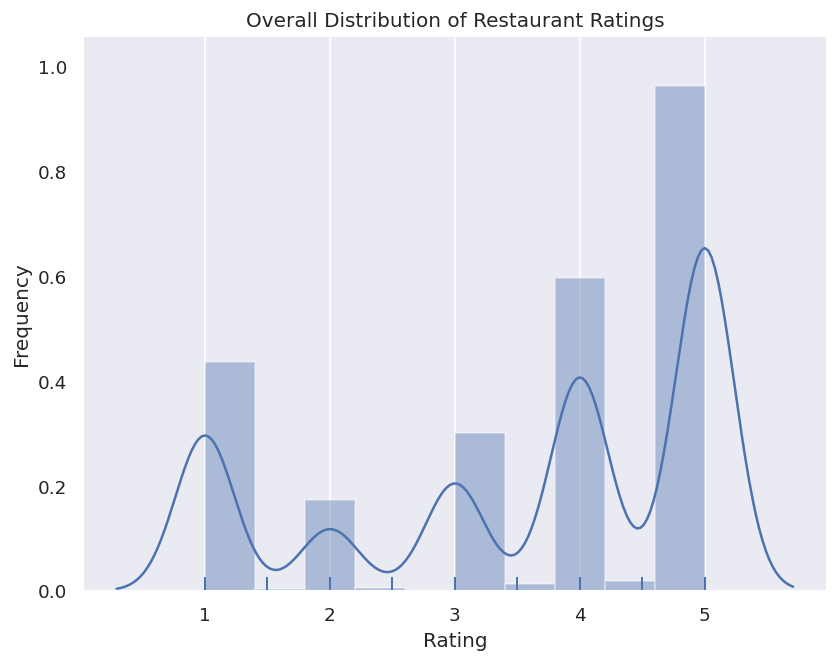

In [127]:
# Let's see overall distribution of restaurant ratings
plt.figure(figsize=(8, 6))
sns.distplot(df2['Rating'], bins=10, kde=True, rug=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Overall Distribution of Restaurant Ratings')
plt.xticks(range(1, 6))  # Set x-axis ticks to range from 1 to 5 (ratings scale)
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

plt.show()


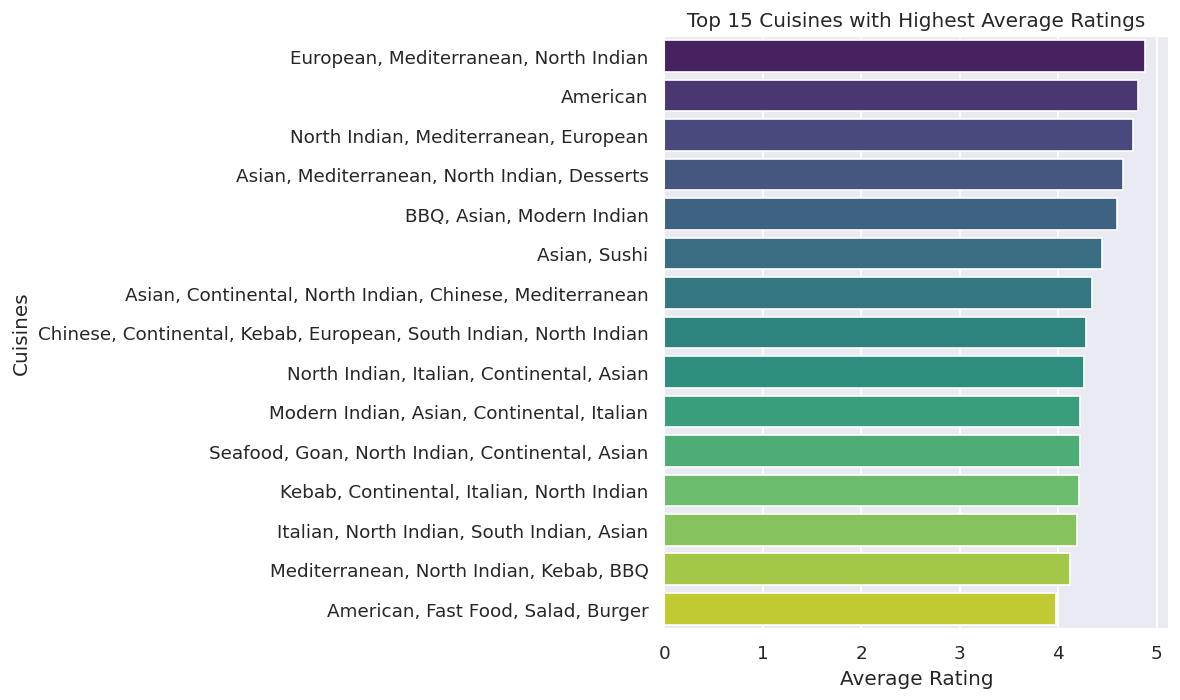

In [128]:
# Let's see are there any specific Collections that tend to receive higher rating.

# Merge the two DataFrames based on the common column 'Name' or 'Restaurant'
merged_df = pd.merge(df1, df2[['Restaurant', 'Rating']], left_on='Name', right_on='Restaurant', how='inner')

# Calculate the average ratings for each cuisine
average_ratings_by_cuisine = merged_df.groupby('Cuisines')['Rating'].mean().reset_index()

# Sort the average ratings in descending order and select the top 15 cuisines
top_15_cuisines = average_ratings_by_cuisine.nlargest(15, 'Rating')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_15_cuisines, x='Rating', y='Cuisines', palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.title('Top 15 Cuisines with Highest Average Ratings')

plt.tight_layout()
plt.show()


#### Chart - 1

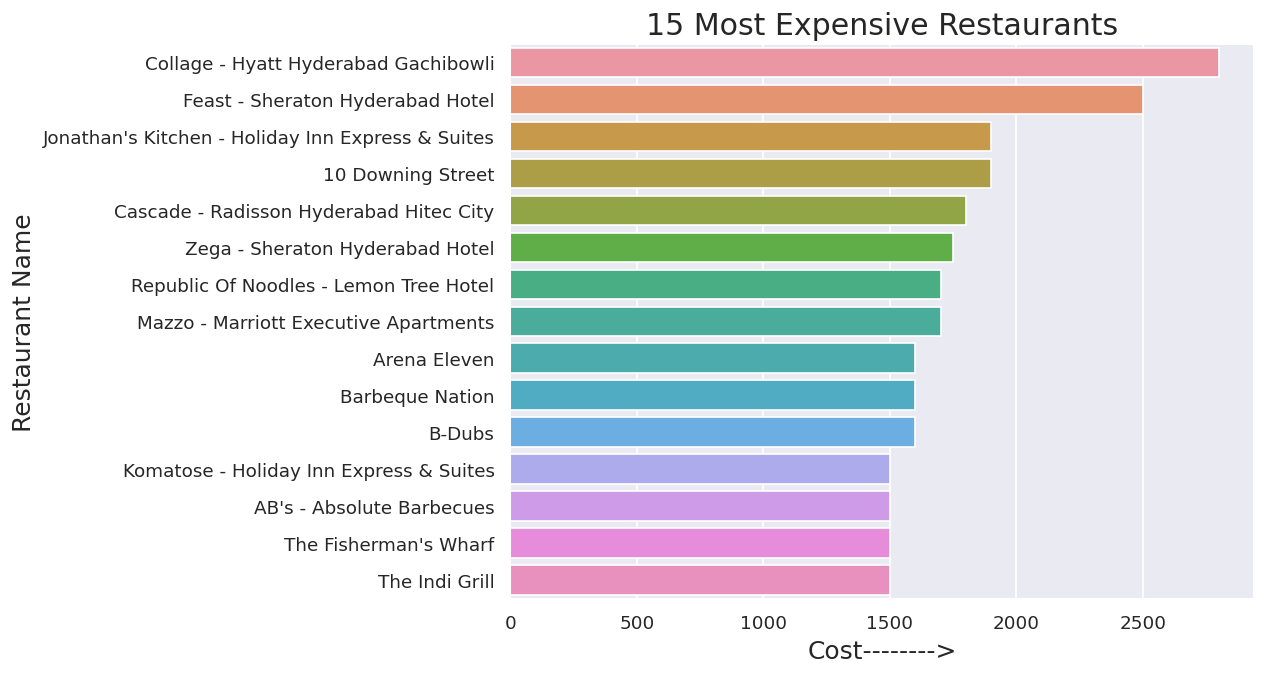

In [129]:
# Let's check for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name",
            data=df1,
            order=df1.sort_values('Cost', ascending=False).Name[:15])

plt.title('15 Most Expensive Restaurants', fontsize=18)
plt.xlabel('Cost-------->', fontsize=15)
plt.ylabel('Restaurant Name', fontsize=15)

plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 2

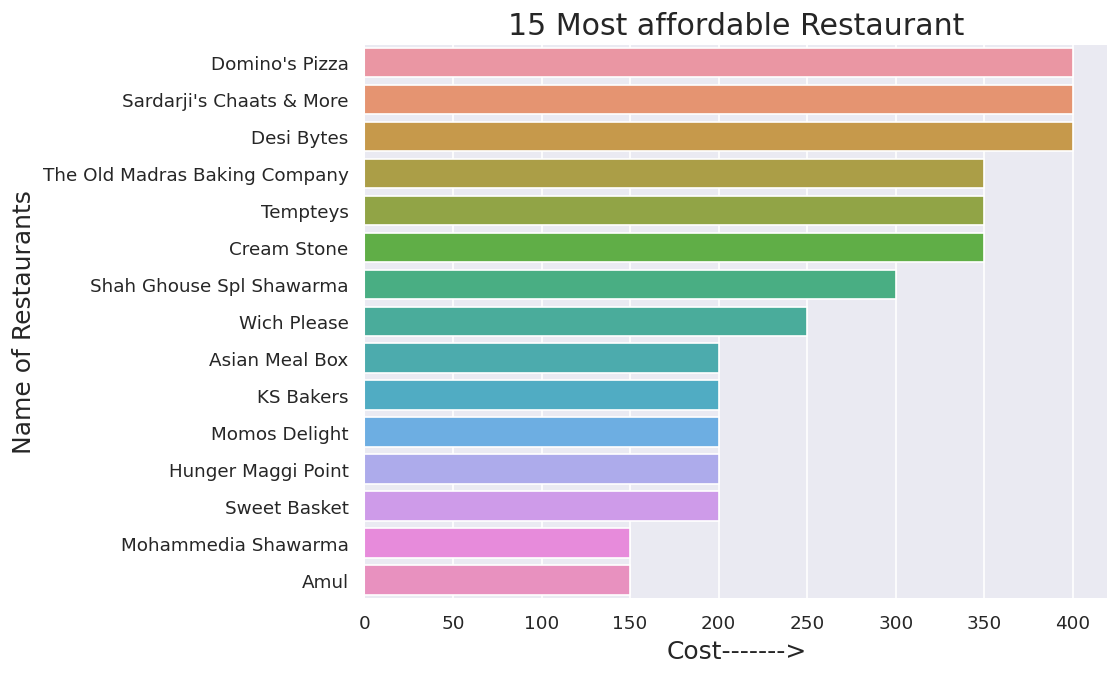

In [130]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name",
            data=df1,
            order=df1.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable Restaurant', fontsize=18)
plt.xlabel('Cost------->', fontsize=15)
plt.ylabel('Name of Restaurants', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 3

In [131]:
# spliting the cusines and storing in list
cuisine_list=df1.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

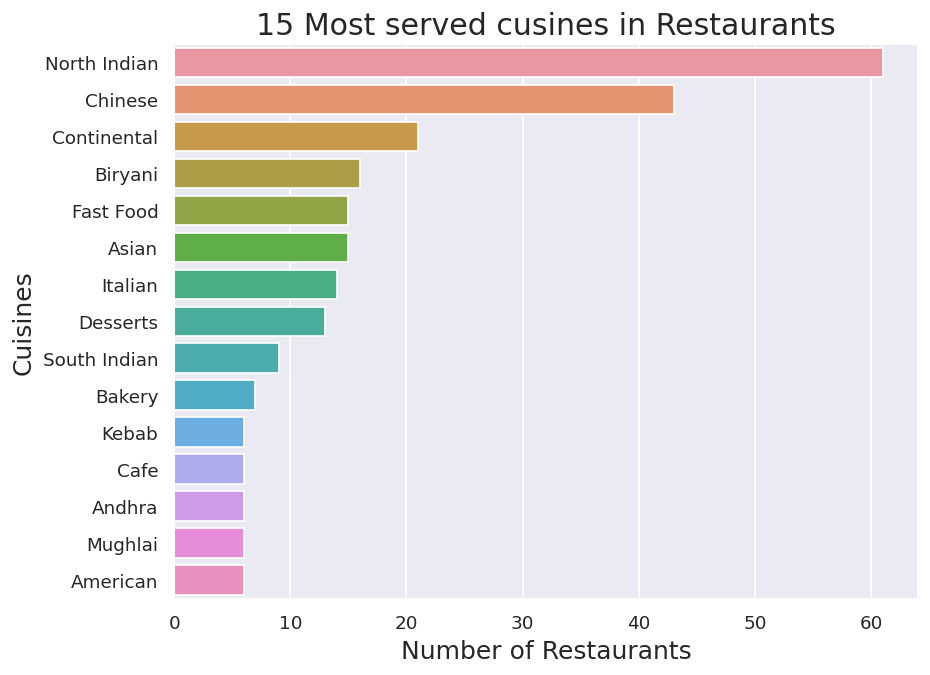

In [132]:
# storing all the cusines in a dict
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:
            cuis_dict[name]=1

# converting the dict to a data frame
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

# graph for most cusines served in df1
sns.barplot(y='Cuisine',
            x="Number of Restaurants",
            data=cuis_df,
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in Restaurants', fontsize=18)
plt.xlabel('Number of Restaurants', fontsize=15)
plt.ylabel('Cuisines', fontsize=15)
plt.show()


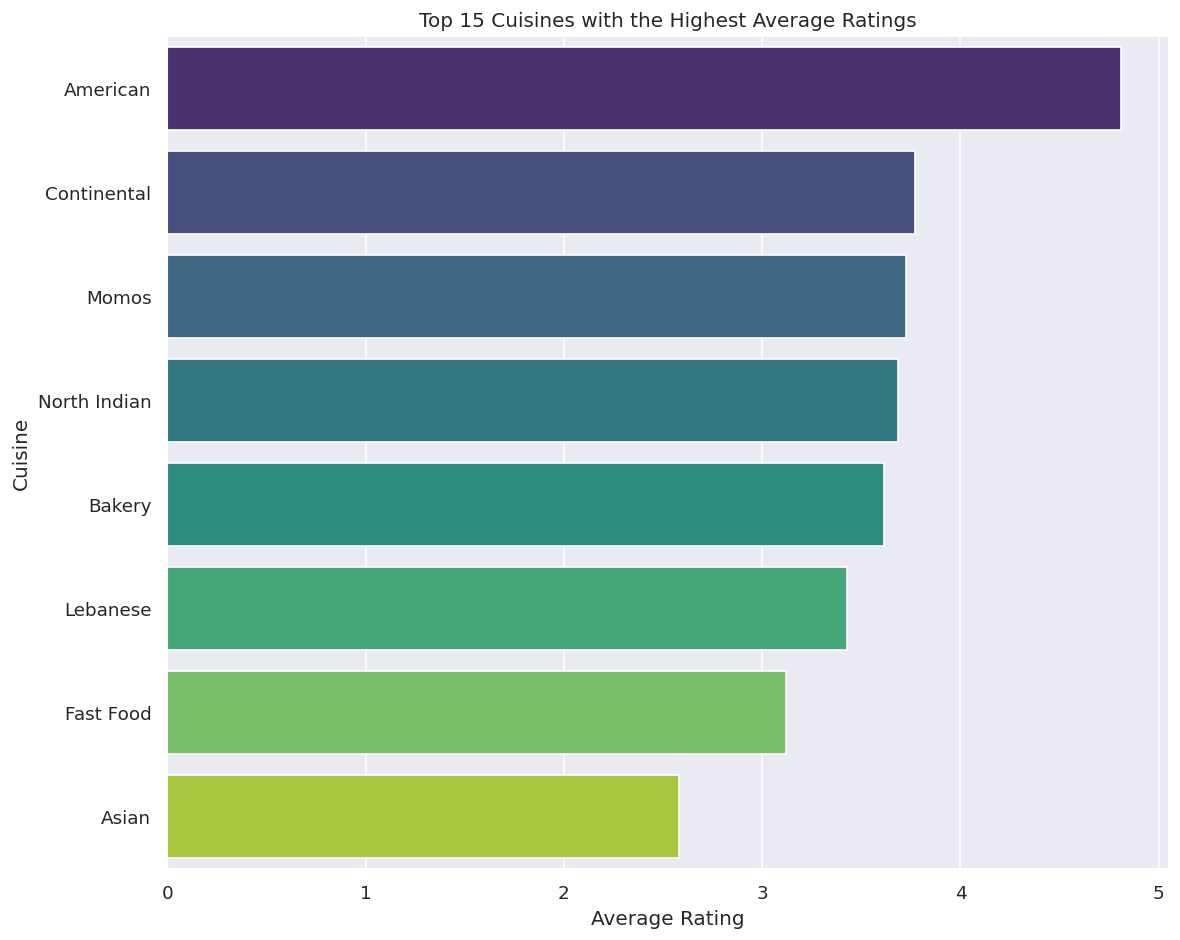

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df1' contains the 'Cuisines' and 'Collection' columns, 'df2' contains the 'Rating' column, and 'cuis_df' is already available with the top cuisines.

# Find the average ratings for each cuisine in df2
merged_df = pd.merge(df1, df2[['Restaurant', 'Rating']], left_on='Name', right_on='Restaurant', how='inner')

average_ratings_by_cuisine = merged_df.groupby('Cuisines')['Rating'].mean().reset_index()

# Filter the average ratings for only the top cuisines from 'cuis_df'
average_ratings_top_cuisines = average_ratings_by_cuisine[average_ratings_by_cuisine['Cuisines'].isin(cuis_df['Cuisine'])]

# Sort the average ratings in descending order and select the top 15 cuisines
top_15_cuisines = average_ratings_top_cuisines.nlargest(15, 'Rating')

# Create the bar plot for the top 15 cuisines with the highest average ratings
plt.figure(figsize=(10, 8))
sns.barplot(data=top_15_cuisines, x='Rating', y='Cuisines', palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Top 15 Cuisines with the Highest Average Ratings')

plt.tight_layout()
plt.show()


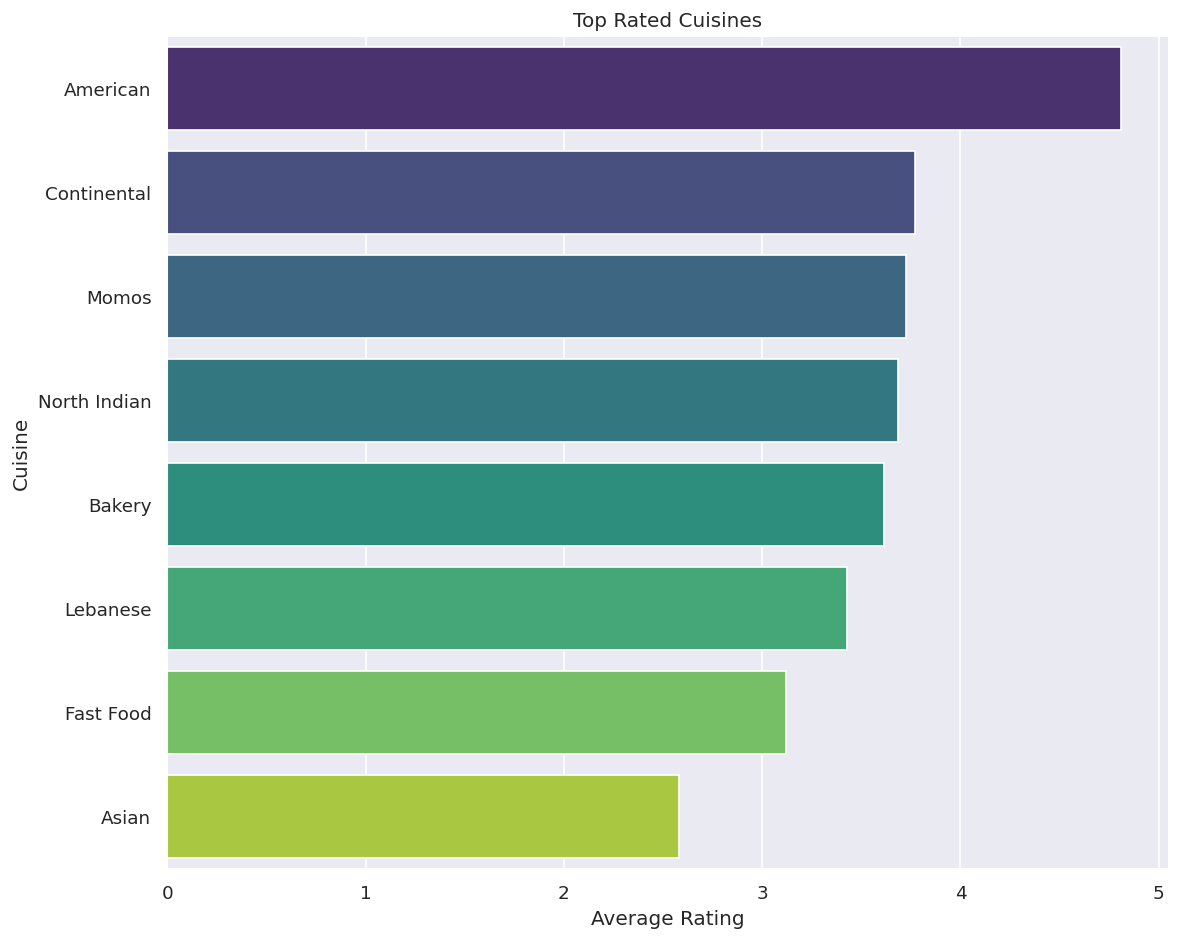

In [134]:


# Find the average ratings for each cuisine in df2
merged_df = pd.merge(df1, df2[['Restaurant', 'Rating']], left_on='Name', right_on='Restaurant', how='inner')

average_ratings_by_cuisine = merged_df.groupby('Cuisines')['Rating'].mean().reset_index()

# Filter the average ratings for only the top cuisines from 'cuis_df'
top_rated_cuisines = average_ratings_by_cuisine[average_ratings_by_cuisine['Cuisines'].isin(cuis_df['Cuisine'])]

# Sort the average ratings in descending order and select the top 15 cuisines
top_rated_cuisines = top_rated_cuisines.nlargest(15, 'Rating')

# Create the bar plot for the top-rated cuisines
plt.figure(figsize=(10, 8))
sns.barplot(data=top_rated_cuisines, x='Rating', y='Cuisines', palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Top Rated Cuisines')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 4

(-0.5, 1399.5, 1399.5, -0.5)

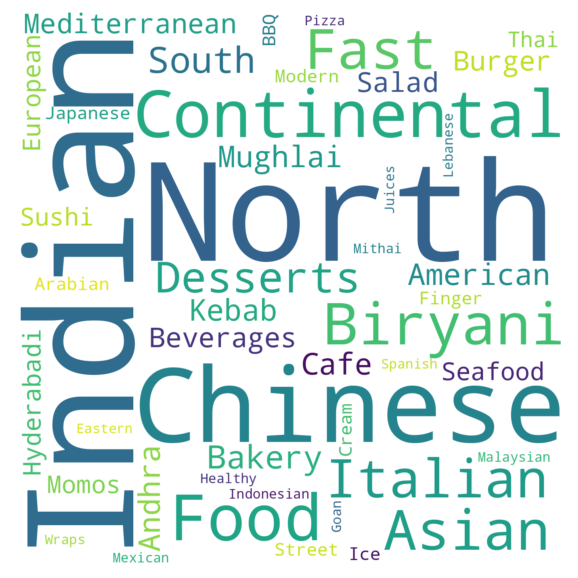

In [135]:
#Creating the text variable

text = " ".join(name for name in df1.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 5

In [136]:
# spliting the cusines and storing in list
Collections_list=df1.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

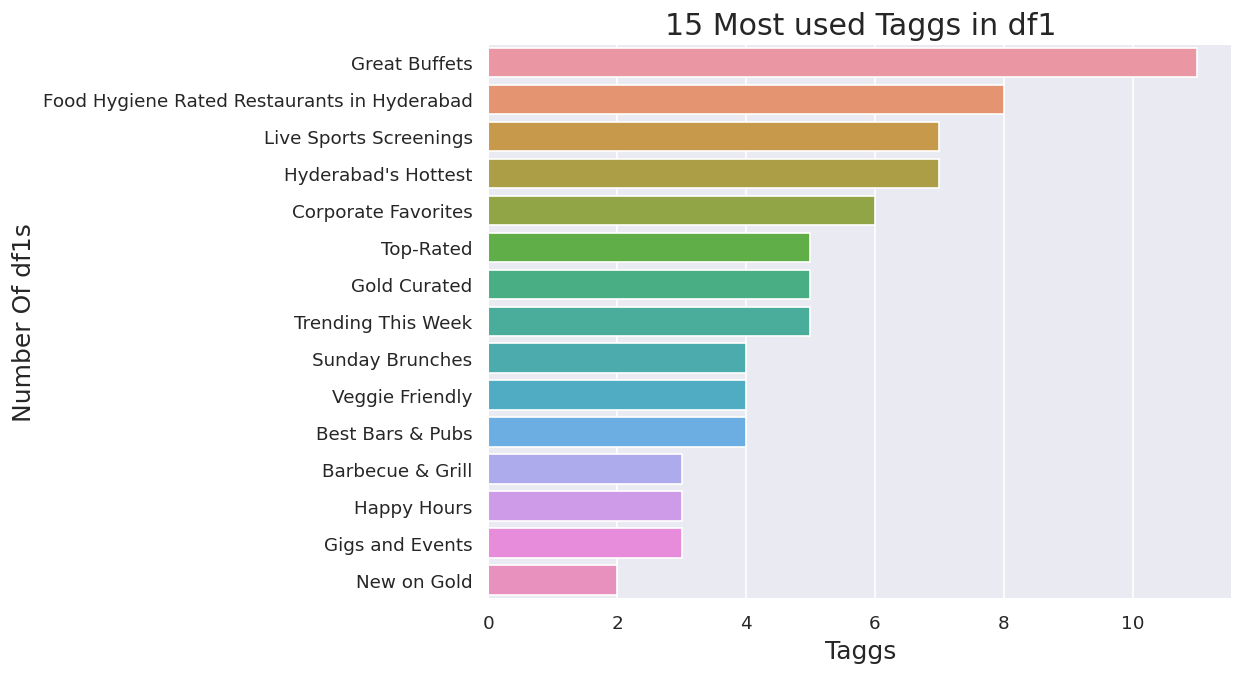

In [137]:
# storing all the cusines in a dict
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:
            Collections_dict[name]=1

# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of df1s'})

# graph for most cusines served in df1
sns.barplot(y='Taggs',
            x="Number of df1s",
            data=Collections_df,
            order=Collections_df.sort_values('Number of df1s',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in df1', fontsize=18)
plt.xlabel('Taggs', fontsize=15)
plt.ylabel('Number Of df1s', fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 6

(-0.5, 1399.5, 1399.5, -0.5)

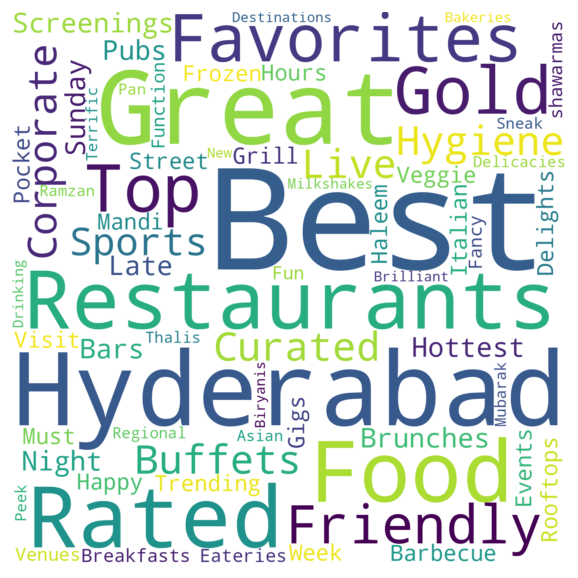

In [138]:
#Creating the text variable

text = " ".join(name for name in Collections_df.Taggs )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 7

In [139]:
df2['Year'].value_counts()

2018.0    4896
2019.0    4802
2017.0     213
2016.0      43
Name: Year, dtype: int64

In [140]:
#better visualisation with plotly
temp_df1 = df2['Hour'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Hour'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'RATING OVER THE Hour' , xaxis = dict(title = 'Hour'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 8

In [141]:
import plotly.graph_objects as go

# Calculate the percentage of each day category
days_count = df2['Day'].value_counts()
total_days = len(df2['Day'])
percentage_days = days_count / total_days * 100

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=days_count.index,
    values=percentage_days,
    hole=0.5,
    textinfo='percent',
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
)])

# Set the title and legend color
title_color = '#8a8d93'
legend_color = 'white'

fig.update_layout(
    title='df2 Distribution by Day',
    title_font=dict(size=25, color=title_color, family="Lato, sans-serif"),
    plot_bgcolor='#444',
    paper_bgcolor='#444',
    legend=dict(
        bgcolor='rgba(0,0,0,0)',  # Set the legend background color to transparent
        font=dict(color=legend_color)
    )
)

# Display the chart
fig.show(renderer='colab')


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 9

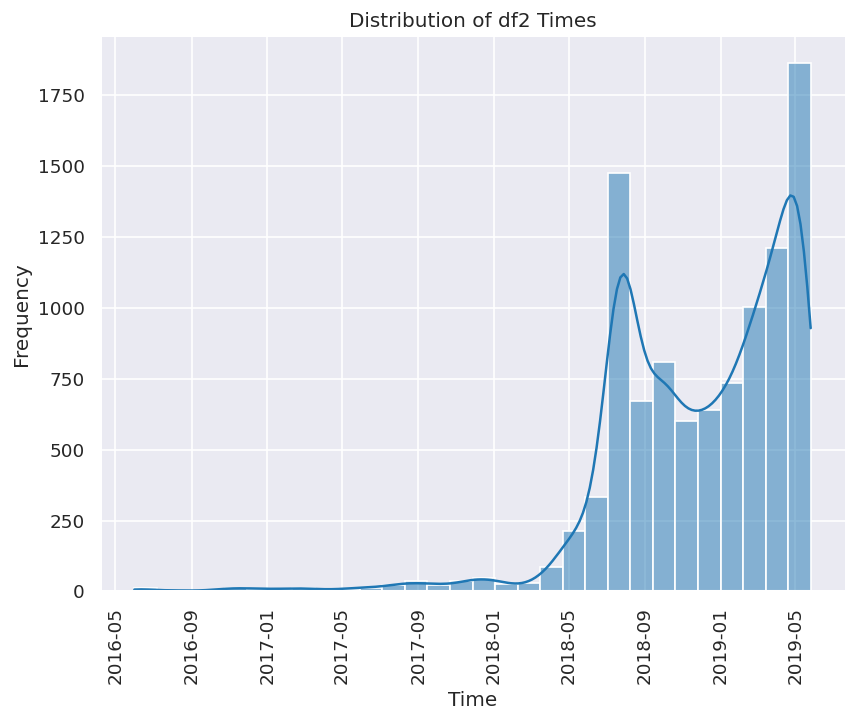

In [142]:

sns.histplot(df2['Time'], bins=30, kde=True, color='#1f77b4')

# Set the title and axis labels
plt.title('Distribution of df2 Times')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Customize the plot background and grid
sns.set(style='whitegrid', rc={'axes.facecolor': '#f0f0f0', 'grid.color': 'white'})

# Remove the right and top spines
sns.despine(right=True, top=True)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 10

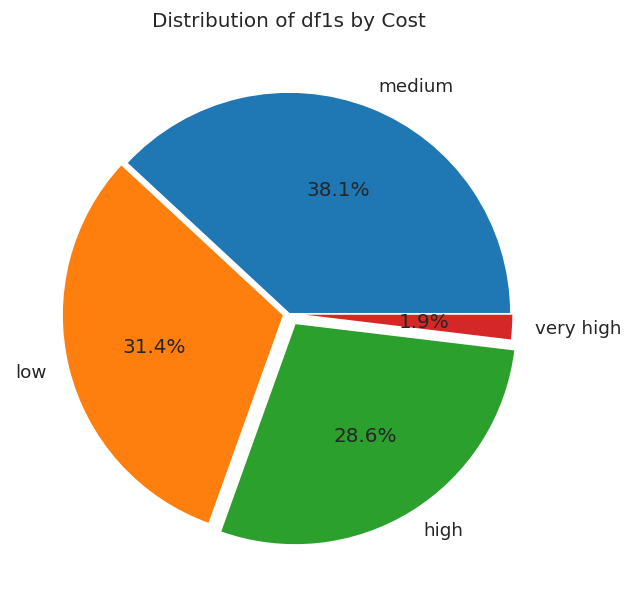

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame containing the df1 data
# Define the cost categories and corresponding labels
cost_categories = {
    'low': (0, 500),
    'medium': (500, 1000),
    'high': (1000, 2000),
    'very high': (2000, float('inf'))
}

# Categorize df1s based on their cost
def categorize_cost(cost):
    for category, (min_cost, max_cost) in cost_categories.items():
        if min_cost <= cost <= max_cost:
            return category

# Apply the categorization function to the 'Cost' column
df1['Cost Category'] = df1['Cost'].apply(categorize_cost)

# Count the number of df1s in each cost category
cost_category_counts = df1['Cost Category'].value_counts()

# Create a pie chart
explode = (0, 0.025, 0.05, 0.01)  # Explode the 'medium' slice
plt.pie(cost_category_counts, labels=cost_category_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], explode=explode)

# Set the title
plt.title('Distribution of df1s by Cost')


# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

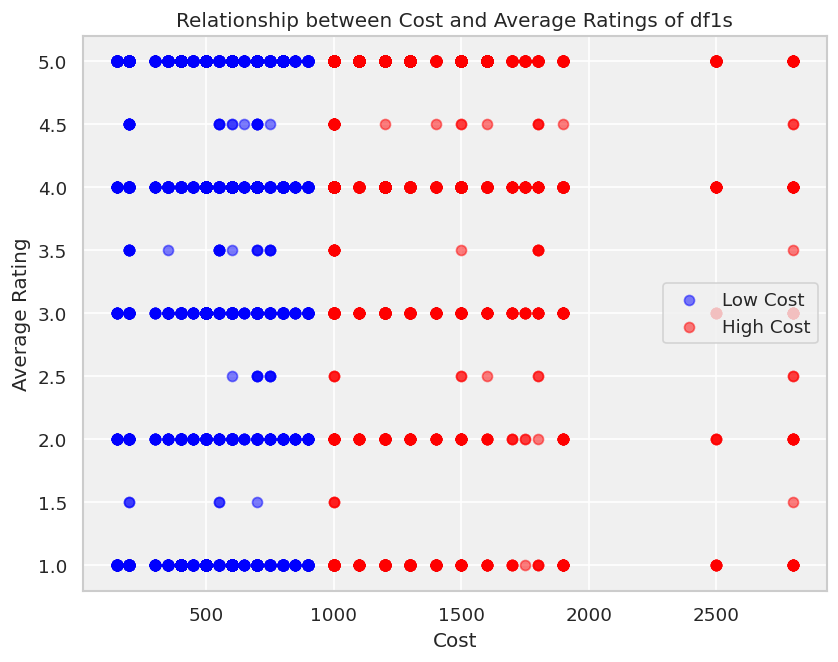

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame containing the df1 data
# Assuming 'df2' is your DataFrame containing the df2 data

# Merge 'df1' DataFrame with 'df2' DataFrame on the common column 'Name'
merged_df = pd.merge(df1, df2, left_on='Name', right_on='Restaurant')

# Convert the 'Cost' and 'Rating' columns to numeric (if they are not already numeric)
merged_df['Cost'] = pd.to_numeric(merged_df['Cost'], errors='coerce')
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# Drop rows with missing values in 'Cost' or 'Rating' columns
merged_df = merged_df.dropna(subset=['Cost', 'Rating'])

# Create separate DataFrames for low cost and high cost
low_cost_df = merged_df[merged_df['Cost'] < 1000]  # Set the threshold for low cost as per your requirement
high_cost_df = merged_df[merged_df['Cost'] >= 1000]  # Set the threshold for high cost as per your requirement

# Create a scatter plot for low cost df1s
plt.scatter(low_cost_df['Cost'], low_cost_df['Rating'], color='blue', alpha=0.5, label='Low Cost')

# Create a scatter plot for high cost df1s
plt.scatter(high_cost_df['Cost'], high_cost_df['Rating'], color='red', alpha=0.5, label='High Cost')

# Set the title and axis labels
plt.title('Relationship between Cost and Average Ratings of df1s')
plt.xlabel('Cost')
plt.ylabel('Average Rating')

# Add a legend
plt.legend()

# Show the plot
plt.show()


* how do the rating vary across different days of the week ?

Text(0, 0.5, 'Average Rating')

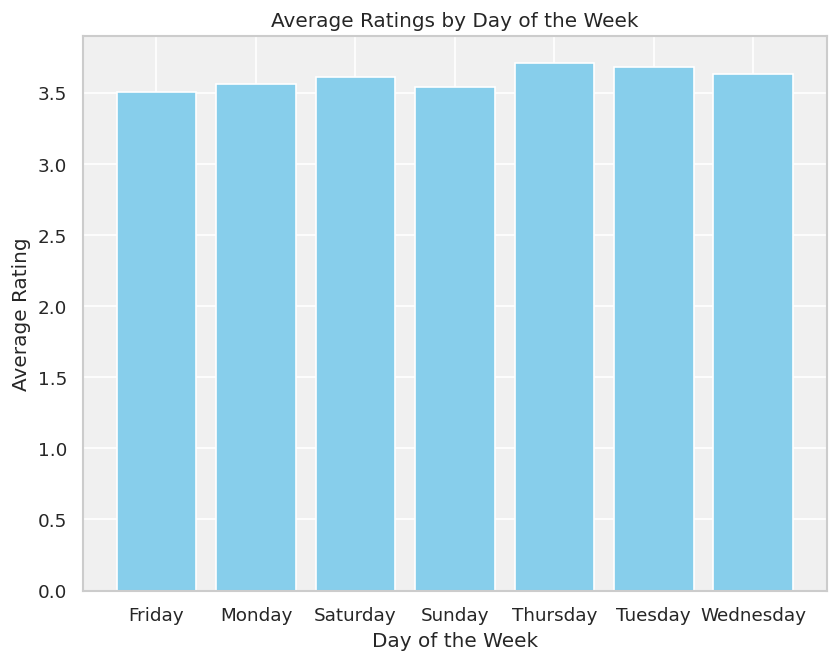

In [145]:
# Group the data by the day of the week and calculate the average rating for each day
average_ratings_by_day = merged_df.groupby('Day')['Rating'].mean()

# Plot the average ratings for different days of the week
plt.bar(average_ratings_by_day.index, average_ratings_by_day.values, color='skyblue')

# Set the title and axis labels
plt.title('Average Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')

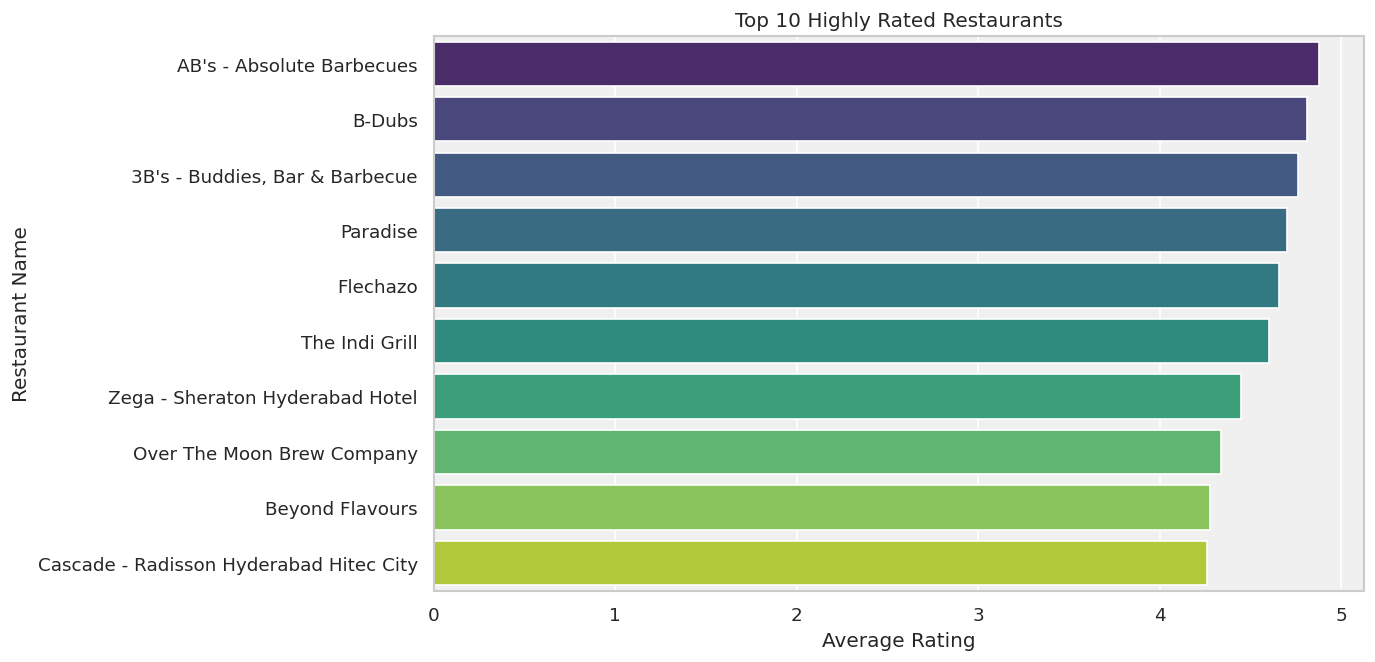

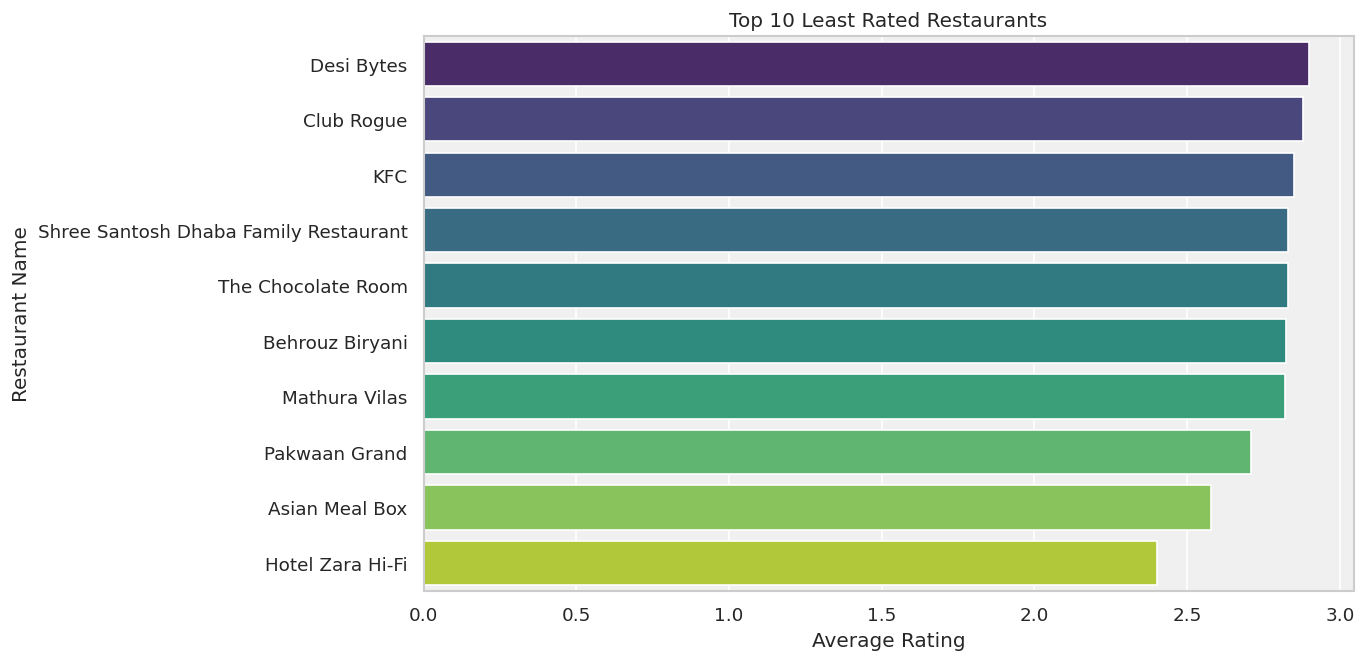

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df1' contains the restaurant details and 'df2' contains the restaurant ratings

# Step 1: Data Preparation
# merged_df = pd.merge(df1, df2[['Restaurant', 'Rating']], left_on='Name', right_on='Restaurant', how='inner')

# Step 2: Identify Highly Rated and Least Rated Restaurants
average_ratings_by_restaurant = merged_df.groupby('Name')['Rating'].mean().reset_index()
sorted_ratings = average_ratings_by_restaurant.sort_values(by='Rating', ascending=False)

most_highly_rated = sorted_ratings.head(10)  # Change '10' to get a different number of top-rated restaurants
least_rated = sorted_ratings.tail(10)  # Change '10' to get a different number of least-rated restaurants

# Step 3: Analyze Key Differences
# Here, you can compare different attributes of the most_highly_rated and least_rated DataFrames
# For example, you can check the cuisines, cost, collections, etc. of these restaurants.

# Step 4: Visualization
# You can create visualizations to better understand the differences. For example, you can use bar plots.

# Bar plot for average ratings of top-rated restaurants
plt.figure(figsize=(10, 6))
sns.barplot(data=most_highly_rated, x='Rating', y='Name', palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Highly Rated Restaurants')
plt.show()

# Bar plot for average ratings of least-rated restaurants
plt.figure(figsize=(10, 6))
sns.barplot(data=least_rated, x='Rating', y='Name', palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Least Rated Restaurants')
plt.show()


In [147]:
df2['Rating'].fillna(df2['Rating'].mean(),inplace=True)

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9954 non-null   object        
 1   Reviewer    9954 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Metadata    9954 non-null   object        
 5   Time        9954 non-null   datetime64[ns]
 6   Pictures    9954 non-null   float64       
 7   Year        9954 non-null   float64       
 8   Month       9954 non-null   float64       
 9   Day         9954 non-null   object        
 10  Hour        9954 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 933.3+ KB


## ***6. Feature Engineering & Data Pre-processing***

In [149]:
# Let's extract No of Review and Followers of Reviewer's from colomn Metadata.
df2['Review_in_num'],df2['Followers']=df2['Metadata'].str.split(',').str
df2['Review_in_num'] = pd.to_numeric(df2['Review_in_num'].str.split(' ').str[0])
df2['Followers'] = pd.to_numeric(df2['Followers'].str.split(' ').str[1])

In [150]:
# Let's Convert the "Followers" column to integer type and fill null values with zero
df2['Followers'] = df2['Followers'].fillna(0).astype(int)
df2['Review_in_num'] = df2['Review_in_num'].fillna(0).astype(int)

In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9954 non-null   object        
 1   Reviewer       9954 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9955 non-null   float64       
 4   Metadata       9954 non-null   object        
 5   Time           9954 non-null   datetime64[ns]
 6   Pictures       9954 non-null   float64       
 7   Year           9954 non-null   float64       
 8   Month          9954 non-null   float64       
 9   Day            9954 non-null   object        
 10  Hour           9954 non-null   float64       
 11  Review_in_num  9955 non-null   int64         
 12  Followers      9955 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           105 non-null    object
 1   Links          105 non-null    object
 2   Cost           105 non-null    int64 
 3   Collections    51 non-null     object
 4   Cuisines       105 non-null    object
 5   Timings        104 non-null    object
 6   Cost Category  105 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.9+ KB


In [153]:
df2[df2['Reviewer']=='Anvesh Chowdary']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Day,Hour,Review_in_num,Followers
3124,Pista House,Anvesh Chowdary,Tried the zafrani 65 biryani and then butter c...,4.0,"1031 Reviews , 1654 Followers",2019-02-14 22:23:00,0.0,2019.0,2.0,Thursday,22.0,1031,1654
7297,Labonel,Anvesh Chowdary,This place stays in the best 5 bakeries in the...,4.0,"1031 Reviews , 1654 Followers",2016-10-27 00:42:00,0.0,2016.0,10.0,Thursday,0.0,1031,1654
9208,Collage - Hyatt Hyderabad Gachibowli,Anvesh Chowdary,I don't expect how people are maintaining the ...,2.0,"1031 Reviews , 1654 Followers",2019-04-04 22:37:00,0.0,2019.0,4.0,Thursday,22.0,1031,1654


In [154]:
df_Reviewer = df2.groupby(['Reviewer']).agg({'Review_in_num': 'sum', 'Followers': 'sum', 'Rating': 'mean'}).reset_index()
most_famous_reviewer = df_Reviewer[(df_Reviewer['Followers'] > 10000) ]
top_15_reviewers = most_famous_reviewer.nlargest(15, 'Review_in_num')
top_15_reviewers


,Reviewer,Review_in_num,Followers,Rating
1019,Avin Seth,1576,11064,4.500000
5780,Shravya Gunipudi,1544,10184,4.062500
3480,Namit Agarwal,1253,13139,3.857143
903,Asad Rana,1086,12306,3.666667
5799,Shreyoshi Mandal,1085,12618,3.571429
3730,Nishtha Chandarana,1057,14812,3.500000
56,Aanchal Khemka,945,11605,3.600000
924,Ashish,766,10924,3.428571
2816,Kunal Khanra,756,11440,4.750000
5460,Satwinder Singh,558,40230,3.666667


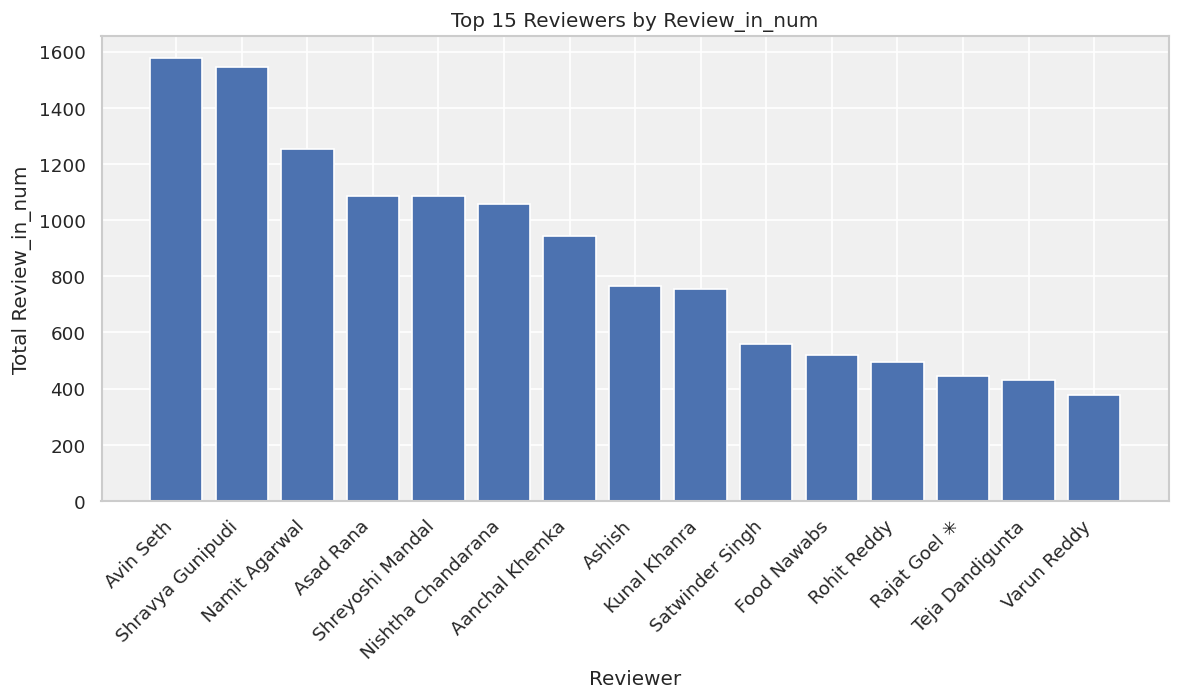

In [155]:
import matplotlib.pyplot as plt

# Assuming 'top_15_reviewers' DataFrame is already available from the previous code

# Extract the data for plotting
reviewers = top_15_reviewers['Reviewer']
review_in_num = top_15_reviewers['Review_in_num']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(reviewers, review_in_num)
plt.xlabel('Reviewer')
plt.ylabel('Total Review_in_num')
plt.title('Top 15 Reviewers by Review_in_num')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust the layout to prevent clipping of labels

plt.show()


Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

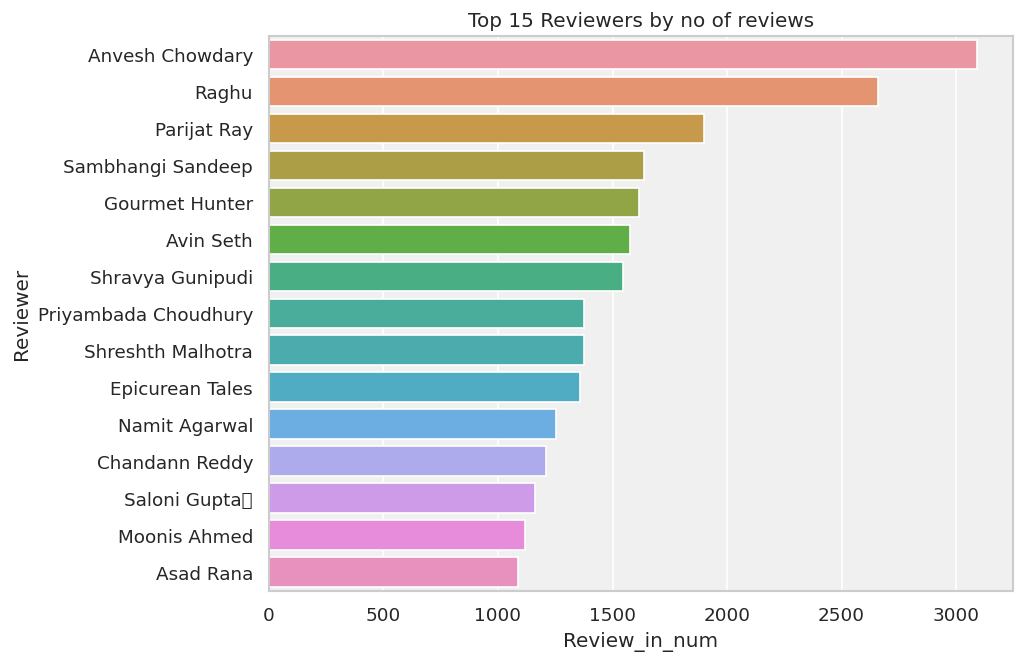

In [156]:
sns.barplot(data=df_Reviewer, x='Review_in_num', y='Reviewer', order=df_Reviewer.sort_values('Review_in_num',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Followers')

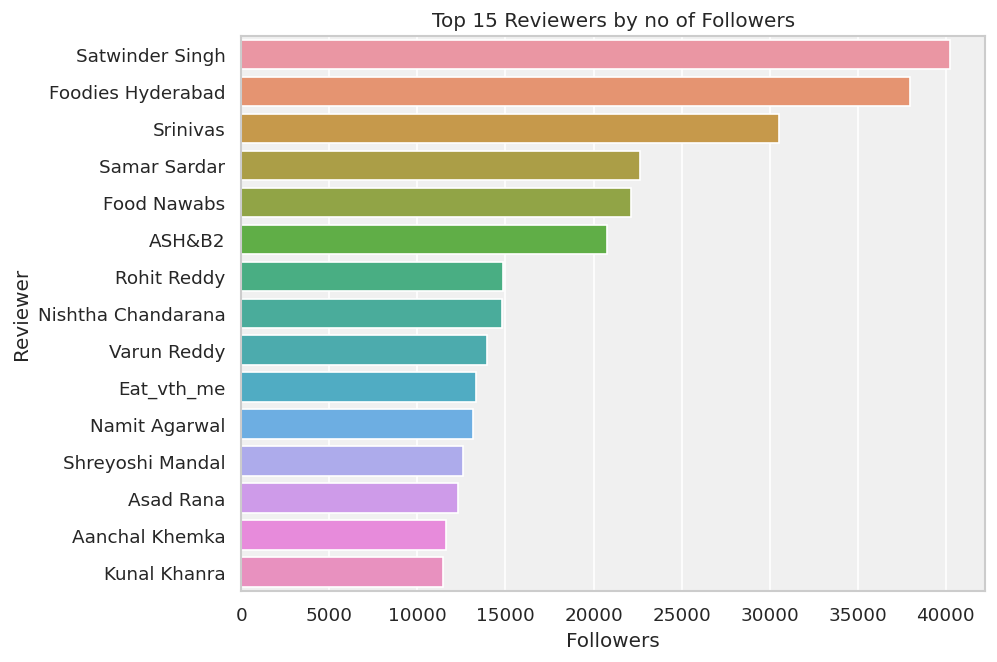

In [157]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')

In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9954 non-null   object        
 1   Reviewer       9954 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9955 non-null   float64       
 4   Metadata       9954 non-null   object        
 5   Time           9954 non-null   datetime64[ns]
 6   Pictures       9954 non-null   float64       
 7   Year           9954 non-null   float64       
 8   Month          9954 non-null   float64       
 9   Day            9954 non-null   object        
 10  Hour           9954 non-null   float64       
 11  Review_in_num  9955 non-null   int64         
 12  Followers      9955 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [159]:
# Drop rows with null values from df2
df2.dropna(inplace=True)

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9954 non-null   object        
 1   Reviewer       9954 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9954 non-null   float64       
 4   Metadata       9954 non-null   object        
 5   Time           9954 non-null   datetime64[ns]
 6   Pictures       9954 non-null   float64       
 7   Year           9954 non-null   float64       
 8   Month          9954 non-null   float64       
 9   Day            9954 non-null   object        
 10  Hour           9954 non-null   float64       
 11  Review_in_num  9954 non-null   int64         
 12  Followers      9954 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 1.1+ MB


### 1. Handling Missing Values

In [161]:
# Let's Replace Null values in rating colomn with mean of rating.
df2['Rating'].fillna(df2['Rating'].mean(),inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

In [162]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [163]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [164]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           105 non-null    object
 1   Links          105 non-null    object
 2   Cost           105 non-null    int64 
 3   Collections    51 non-null     object
 4   Cuisines       105 non-null    object
 5   Timings        104 non-null    object
 6   Cost Category  105 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.9+ KB


In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9954 non-null   object        
 1   Reviewer       9954 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9954 non-null   float64       
 4   Metadata       9954 non-null   object        
 5   Time           9954 non-null   datetime64[ns]
 6   Pictures       9954 non-null   float64       
 7   Year           9954 non-null   float64       
 8   Month          9954 non-null   float64       
 9   Day            9954 non-null   object        
 10  Hour           9954 non-null   float64       
 11  Review_in_num  9954 non-null   int64         
 12  Followers      9954 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [166]:
df1['Cuisines'][0]

'Chinese, Continental, Kebab, European, South Indian, North Indian'

In [167]:
df1['Collections'][0]

'Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings'

In [168]:
# storing reviews in a variable for data processing
reviews=df2.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [169]:
# Expand Contraction
!pip install contractions


In [170]:
#download small spacy model
!python -m spacy download en_core_web_sm

2023-07-29 07:36:58.834833: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [171]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'anything', 'not', 'yourself', 'made', 'cannot', 'beside', 'everyone', 'were', 'sixty', 'she', 'doing', "'d", 'whereafter', 'without', 'other', 'beyond', 'four', 'being', 'down', 'noone', 'mine', 'itself', 'before', 'a', 'we', 'eleven', 'elsewhere', 'another', 'thru', 'whenever', 'nothing', "'ll", 'of', 'first', 'whereupon', 'am', 'more', 'been', 'already', '‘ve', '’ll', 'give', 'anyhow', 'much', 'get', 'otherwise', 'same', "'re", 'might', 'except', 'when', 'have', 'whoever', 'unless', 'was', 'from', 'top', 'two', 'does', 'thereupon', 'you', 'even', 'could', 'although', 'now', 'just', 'it', 'out', 'one', "'ve", 'whereby', 'to', 'against', 'while', 'almost', 'is', 'seems', 'and', 'amongst', 'can', 'us', 'moreover', '‘d', 'thence', 'former', 'myself', 'yourselves', 'will', 'regarding', 'less', 'neither', 'really', 'ourselves', 'them', 'whatever', 'becoming', 'him', 'would', 'latter', 'twelve', 'that', 'full', 'somehow', 'namely', 'take', 'hundred', 'into', 'formerly', 'latterly', '’d', 

In [172]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

# storing nlp stop wors in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['anything',
 'not',
 'yourself',
 'made',
 'cannot',
 'beside',
 'everyone',
 'were',
 'sixty',
 'she',
 'doing',
 "'d",
 'whereafter',
 'without',
 'other',
 'beyond',
 'four',
 'being',
 'down',
 'noone',
 'mine',
 'itself',
 'before',
 'a',
 'we',
 'eleven',
 'elsewhere',
 'another',
 'thru',
 'whenever',
 'nothing',
 "'ll",
 'of',
 'first',
 'whereupon',
 'am',
 'more',
 'been',
 'already',
 '‘ve',
 '’ll',
 'give',
 'anyhow',
 'much',
 'get',
 'otherwise',
 'same',
 "'re",
 'might',
 'except',
 'when',
 'have',
 'whoever',
 'unless',
 'was',
 'from',
 'top',
 'two',
 'does',
 'thereupon',
 'you',
 'even',
 'could',
 'although',
 'now',
 'just',
 'it',
 'out',
 'one',
 "'ve",
 'whereby',
 'to',
 'against',
 'while',
 'almost',
 'is',
 'seems',
 'and',
 'amongst',
 'can',
 'us',
 'moreover',
 '‘d',
 'thence',
 'former',
 'myself',
 'yourselves',
 'will',
 'regarding',
 'less',
 'neither',
 'really',
 'ourselves',
 'them',
 'whatever',
 'becoming',
 'him',
 'would',
 'latter',
 'twel

#### 1. Lower Casing

In [173]:
def lower_case(text):
  '''convert the string in lower case
  '''
  text=[x.lower() for x in text]
  return text

In [174]:
reviews=lower_case(reviews)

#### 2. Removing Punctuations

In [175]:
import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

In [176]:
reviews=remove_punctuation(reviews)

#### 3. Removing URLs & Removing words and digits contain digits.

In [177]:
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [178]:
reviews=remove_non_leters(reviews)

#### 4. Removing White spaces

In [179]:
def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [180]:
reviews=remove_all_extra_spaces(reviews)

####5. Removing Non ASCII Charaters

In [181]:
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words
            if all(char in ascii_chars for char in word)]

In [182]:
reviews=remove_non_ascii_prinatble_from_list(reviews)

#### 6. Expand Contraction

In [183]:
import contractions
def remove_contrations(text):
  '''shotents the words form
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

In [184]:
reviews=remove_contrations(reviews)

#### 7. Text Normalization

In [185]:
def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text

In [186]:
reviews=lemmatization_(reviews)

#### 8. Removing Stopwords

In [196]:
stop_list = set(stopwords.words('english'))

In [197]:
def remove_stop_words (text):
  test_2=[]
  for x in df2:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [198]:
reviews=remove_stop_words(reviews)

##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

#### 10. Text Vectorization

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

##### What data splitting ratio have you used and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

### ML Model - 1

In [190]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [191]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [192]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 2

In [193]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [194]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [195]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 3

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***